In [1]:
### This began with a great head start from Johnowhitaker:
### https://zindi.africa/competitions/fowl-escapades/discussions/675

In [2]:
### And the first serious attempt to ensure I can reproduce identical results with a FastAI model & notebook
### the jupyter notebook was started with this command:
### env PYTHONHASHSEED=42 jupyter notebook
### per this FastAI thread: 
### https://forums.fast.ai/t/solved-reproducibility-where-is-the-randomness-coming-in/31628/15

In [3]:
### next step in reproducibility is to set up the various seeds within the notebook
### and this will need to be called:
###  You have to run random_seed(0), before the first fit;
###  You have to run it before creating the databunch;
###  And you have to call it every time for each different time you call fit.

def random_seed(seed_value, use_cuda):
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    random.seed(seed_value) # Python
    if use_cuda: 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

In [4]:
!ls

blend_f18f.csv			      fastai_v7.csv
blend_f18f_v2.csv		      five-sec-samples.ipynb
blend_f18f_v3.csv		      models
blend.R				      repro-fowl-A17a.ipynb
blend_v6_v7.csv			      repro-fowl-A17a-v2.ipynb
colab-follow-along.ipynb	      repro-fowl-A17b.ipynb
colab-improve-try1.ipynb	      repro-fowl-A17c.ipynb
colab-improve-try2.ipynb	      repro-fowl-A17d.ipynb
colab-improve-try3-rn34.ipynb	      repro-fowl-A17e.ipynb
colab-improve-try4-rn50.ipynb	      repro-fowl-A17f.ipynb
colab-improve-try5-rn50v2.ipynb       repro-fowl-A17g.ipynb
colab-improve-try6-densenet201.ipynb  repro-fowl-A17h.ipynb
day1.R				      repro-fowl-A17i.ipynb
default_plus_WBSR.csv		      repro-fowl-A17j.ipynb
default_sub.csv			      repro-fowl-A17k.ipynb
fastai_A17a.csv			      repro-fowl-data-creation.ipynb
fastai_A17av2.csv		      Rsplits
fastai_A17b.csv			      Rsplits_Test
fastai_A17c.csv			      Rsplits_Train
fastai_A17d.csv			      R_splitter.R
fastai_A17e.csv			      SampleSubmission.csv
fastai_A17f.csv			  

In [5]:
import pandas as pd
sub = pd.read_csv('SampleSubmission.csv')
sub.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01S9OX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02CS12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,02LM3W,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0C3A2V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train = pd.read_csv('Train.csv')
train.head()

,ID,common_name
0,MBMG2C,Ring-necked Dove
1,K8LJSB,Ring-necked Dove
2,OGD9L6,Ring-necked Dove
3,581PCQ,Ring-necked Dove
4,P91M1F,Ring-necked Dove


In [7]:
birds = sub.columns[1:]
birds

Index(['Ring-necked Dove', 'Black Cuckoo', 'Red-chested Cuckoo',
       'Fiery-necked Nightjar', 'Green Wood Hoopoe', 'Crested Barbet',
       'Cape Batis', 'Olive Bushshrike', 'Orange-breasted Bushshrike',
       'Bokmakierie', 'Black-backed Puffback', 'Southern Boubou',
       'Black-headed Oriole', 'Fork-tailed Drongo',
       'African Paradise Flycatcher', 'Sabota Lark', 'Eastern Clapper Lark',
       'Rufous-naped Lark', 'Dark-capped Bulbul', 'Sombre Greenbul',
       'Long-billed Crombec', 'African Reed Warbler', 'Rattling Cisticola',
       'Levaillants Cisticola', 'Tawny-flanked Prinia', 'Karoo Prinia',
       'Bar-throated Apalis', 'Green-backed Camaroptera',
       'Chestnut-vented Warbler', 'Cape White-eye', 'Karoo Scrub Robin',
       'White-browed Scrub Robin', 'Cape Robin-Chat',
       'White-browed Robin-Chat', 'Chorister Robin-Chat',
       'Southern Double-collared Sunbird', 'White-bellied Sunbird',
       'African Pipit', 'African Rock Pipit', 'Cape Bunting'],
      d

In [8]:
# Add file names
train['file_name'] = 'Train/'+train['ID']+'.mp3'
sub['file_name'] = 'Test/'+sub['ID']+'.mp3'

In [9]:
import IPython.display as ipd
from matplotlib import pyplot as plt
import librosa

In [10]:
# Checking that the spectrograms were generated successfully:
import glob
ims = glob.glob('Train/*.png')
train['img_path'] = train['file_name'].str[:-4]+'.png'
print(len(ims), len(train))

1857 1857


In [11]:
# Similarly, test now has rows for files that have had spectrograms created.
sub['img_path'] = sub['file_name'].str[:-4]+'.png'
ims = glob.glob('Test/*.png')
test = sub.loc[sub.img_path.isin(ims)]
print(len(sub), len(test))

911 911


In [12]:
from fastai.vision import *

In [13]:
random_seed(42,use_cuda=True)

data = ImageDataBunch.from_df(path="./", df=train[["img_path", "common_name"]], ds_tfms=get_transforms(), size=299, num_workers=0)\
  .split_by_rand_pct(valid_pct=0.10, seed=42)\
  .label_from_df(cols='common_name')\
  .databunch(bs=8)\
  .normalize(imagenet_stats)

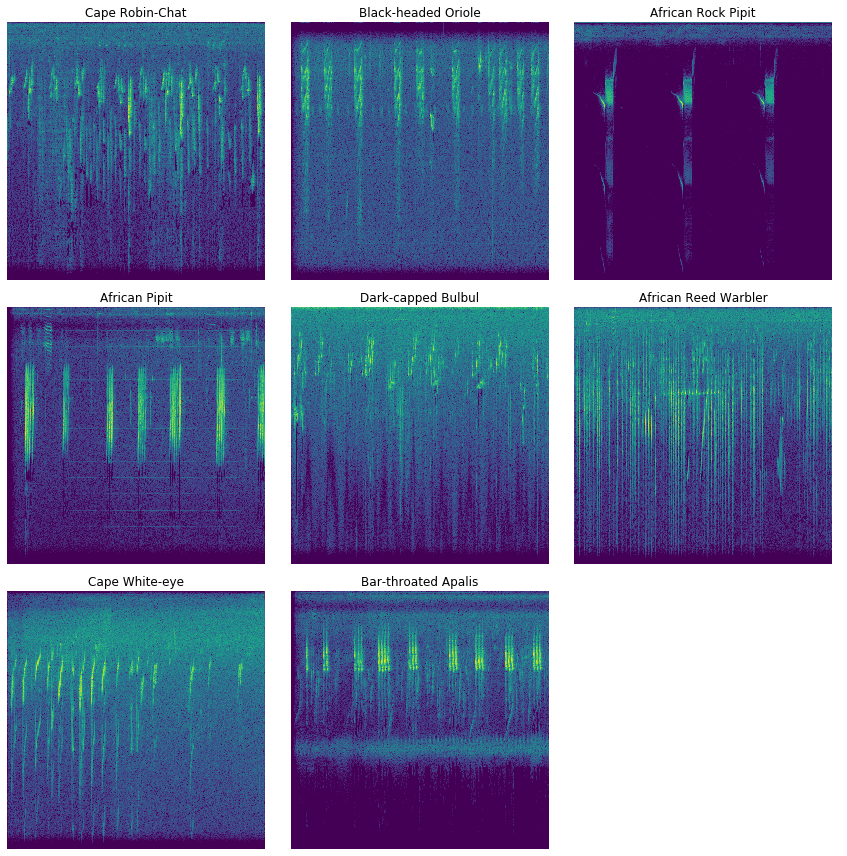

In [14]:
data.show_batch(rows=3)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


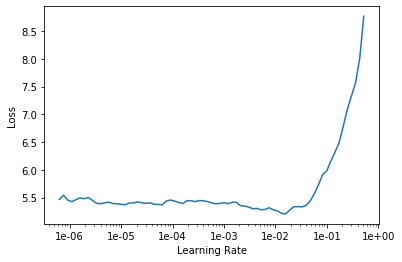

In [15]:
# Going to set this a lot
random_seed(42,use_cuda=True)

# Create a learner and pick a learning rate
learn = cnn_learner(data, models.densenet201, metrics=[error_rate])
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,5.018734,3.841535,0.939189,01:14
1,4.153074,3.231378,0.837838,01:14
2,3.589951,3.059789,0.763514,01:14
3,2.992630,2.672049,0.682432,01:14
4,2.601873,2.590534,0.628378,01:15
5,2.047120,2.057503,0.560811,01:14
6,1.794569,1.912214,0.520270,01:14
7,1.424307,1.843058,0.493243,01:15
8,1.173263,1.896250,0.472973,01:15
9,0.972745,1.684294,0.439189,01:14


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


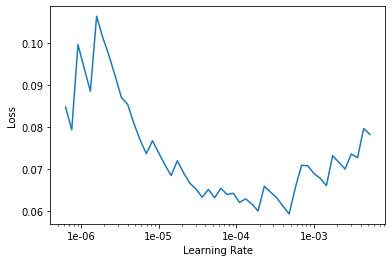

In [16]:
# Going to set this a lot
random_seed(42,use_cuda=True)

# Train the head of the model
learn.fit_one_cycle(20, 1e-3)
learn.lr_find()
learn.recorder.plot()

In [17]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.unfreeze()
#learn.lr_find()
#learn.recorder.plot()

In [18]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.fit_one_cycle(8, slice(1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.071188,1.516873,0.364865,01:37
1,0.062820,1.518129,0.378378,01:37
2,0.075993,1.583945,0.378378,01:37
3,0.045478,1.577197,0.385135,01:37
4,0.042409,1.562064,0.378378,01:39
5,0.032931,1.529659,0.358108,01:37
6,0.016306,1.527085,0.364865,01:36
7,0.013502,1.558686,0.378378,01:37


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


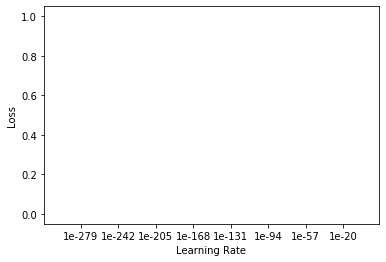

In [19]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.lr_find()
learn.recorder.plot()

In [20]:
# Going to set this a lot
random_seed(42,use_cuda=True)

learn.fit_one_cycle(12, slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.049125,1.505253,0.364865,01:37
1,0.024972,1.510685,0.378378,01:37
2,0.025303,1.575588,0.364865,01:36
3,0.018149,1.573676,0.378378,01:40
4,0.016680,1.562659,0.378378,01:39
5,0.018674,1.534310,0.358108,01:38
6,0.012422,1.528683,0.358108,01:37
7,0.010964,1.559498,0.371622,01:36
8,0.007263,1.562617,0.364865,01:36
9,0.010088,1.538799,0.358108,01:36


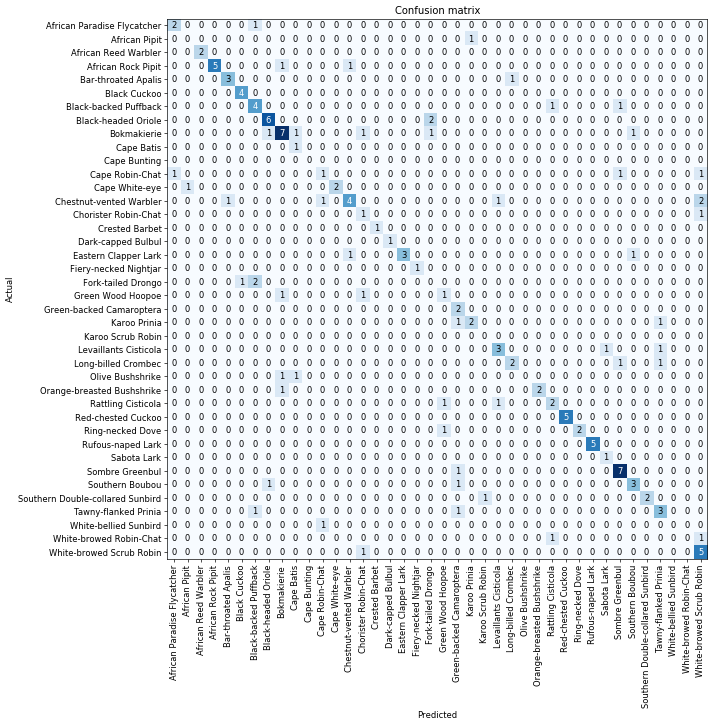

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
# Going to set this a lot
random_seed(42,use_cuda=True)

# Add the test data as a test set for the model
src = (ImageList.from_df(path='./', df=test, cols='img_path')) # Note test, not sub, as we only have spectrograms for the ims in test
learn.data.add_test(src)

In [23]:
# Get predictions
preds, y = learn.get_preds(DatasetType.Test)

In [24]:
# Add preds to test
test = test.copy()
for b in birds:
  test[b] = preds[:,learn.data.classes.index(b)]
test.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_name,img_path
0,019OYB,2.218413e-05,1.993338e-05,0.000394,9.989997e-01,1.132905e-06,0.000001,2.850607e-07,8.552029e-07,2.359525e-07,...,4.049443e-07,8.479045e-07,9.100407e-06,9.846085e-07,9.222597e-07,5.819959e-09,2.555001e-06,1.612204e-06,Test/019OYB.mp3,Test/019OYB.png
1,01S9OX,9.679907e-05,7.614525e-06,0.000030,4.852719e-06,3.313272e-05,0.000015,8.015459e-04,6.124109e-05,7.136491e-04,...,1.070074e-04,9.228069e-06,2.148461e-04,1.458468e-05,1.947460e-05,1.325744e-04,2.723200e-05,2.125628e-03,Test/01S9OX.mp3,Test/01S9OX.png
2,02CS12,1.542032e-03,1.409611e-03,0.000877,1.720632e-03,6.493411e-03,0.001669,1.645924e-02,1.389751e-03,1.105917e-02,...,2.482616e-04,2.851837e-04,5.690936e-03,2.836477e-01,6.634363e-03,1.866798e-01,7.482010e-03,6.396214e-02,Test/02CS12.mp3,Test/02CS12.png
3,02LM3W,4.810053e-07,1.017695e-07,0.000001,2.311262e-08,2.042663e-07,0.000003,8.284378e-06,9.948601e-01,2.997013e-05,...,1.508102e-09,3.309290e-08,5.970466e-07,4.755233e-09,1.422138e-06,2.365499e-08,2.085555e-08,2.677269e-07,Test/02LM3W.mp3,Test/02LM3W.png
4,0C3A2V,1.913020e-04,2.972582e-05,0.000069,6.634897e-04,1.267938e-02,0.000020,1.649586e-04,2.843952e-03,1.117820e-05,...,1.845606e-03,9.230572e-01,1.848001e-02,3.421912e-04,1.502708e-04,4.433595e-06,4.468012e-05,2.503286e-05,Test/0C3A2V.mp3,Test/0C3A2V.png


In [25]:
# Merge back into submission DF, adding a low prob prediction for rows where we had no image generated
cols = ['ID']
for b in birds:
  cols.append(b)
ss = pd.merge(sub['ID'], test[cols], on='ID', how='left' )
ss = ss.fillna(1/40) # For those with NaNs (if you only generated spectrograms for a subset of the test mp3s)
ss.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,2.218413e-05,1.993338e-05,0.000394,9.989997e-01,1.132905e-06,0.000001,2.850607e-07,8.552029e-07,2.359525e-07,...,1.358284e-06,6.705443e-07,4.049443e-07,8.479045e-07,9.100407e-06,9.846085e-07,9.222597e-07,5.819959e-09,2.555001e-06,1.612204e-06
1,01S9OX,9.679907e-05,7.614525e-06,0.000030,4.852719e-06,3.313272e-05,0.000015,8.015459e-04,6.124109e-05,7.136491e-04,...,1.281443e-05,3.427991e-04,1.070074e-04,9.228069e-06,2.148461e-04,1.458468e-05,1.947460e-05,1.325744e-04,2.723200e-05,2.125628e-03
2,02CS12,1.542032e-03,1.409611e-03,0.000877,1.720632e-03,6.493411e-03,0.001669,1.645924e-02,1.389751e-03,1.105917e-02,...,2.045744e-02,1.344869e-04,2.482616e-04,2.851837e-04,5.690936e-03,2.836477e-01,6.634363e-03,1.866798e-01,7.482010e-03,6.396214e-02
3,02LM3W,4.810053e-07,1.017695e-07,0.000001,2.311262e-08,2.042663e-07,0.000003,8.284378e-06,9.948601e-01,2.997013e-05,...,5.147442e-09,4.652327e-07,1.508102e-09,3.309290e-08,5.970466e-07,4.755233e-09,1.422138e-06,2.365499e-08,2.085555e-08,2.677269e-07
4,0C3A2V,1.913020e-04,2.972582e-05,0.000069,6.634897e-04,1.267938e-02,0.000020,1.649586e-04,2.843952e-03,1.117820e-05,...,8.484079e-05,2.989245e-04,1.845606e-03,9.230572e-01,1.848001e-02,3.421912e-04,1.502708e-04,4.433595e-06,4.468012e-05,2.503286e-05


In [26]:
# Check shape
ss.shape

(911, 41)

In [27]:
# Save predictions
ss.to_csv('fastai_A17k.csv', index=False)

# Save model
learn.save('model-A17k')

In [28]:
# LB Score v6: 1.55 (val loss 1.73)
# LB Score v7: 1.698 (val loss 1.71, but lower class accuracy)